In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df_path="./Resources/AGE - household purchases Agg Data.csv"

In [3]:
df_age = pd.read_csv(df_path)

In [4]:
df_age.head ()

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,NaN,NaN
1,4006,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
2,4,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
3,402,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,NaN,NaN
4,403,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,NaN,NaN


In [5]:
cleandf=df_age.drop(["RSE indicator(a)", "% change since 201516", "sig(b)", "trend since 201516(c)", "Code" ],axis=1)
cleandf

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,NaN,NaN,Spirits,NaN,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,NaN,NaN,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4
1684,NaN,NaN,Alcopops,NaN,75_and_over,ml,1,2,4,1,...,0,7,4,4,4,1,1,1,7,0
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cleandf.fillna("--")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,--,--,Spirits,--,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,--,--,Liqueurs and cocktails,--,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4
1684,--,--,Alcopops,--,75_and_over,ml,1,2,4,1,...,0,7,4,4,4,1,1,1,7,0
1685,--,--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [ ]:
#The popularity of fresh tomatoes within the 30-39 age group between 2001/2 and 2018/9

tominfo= cleandf.loc[(cleandf["Major Food Code"] == "Fresh tomatoes")]
tom2info=tominfo.loc[(tominfo["Age Group"]== "30-39")]
cleantom=tom2info.drop(["Food Category", "Food Group", "Minor Food Code", "Units", "Age Group","Major Food Code"], axis=1)
cleantom=cleantom.transpose()
cleantom.columns =[ 'Amount']
cleantom['Years'] = cleantom.index
cleantom.info ()


## Notes for team!
So first use the cleandf and .loc to find your information, it should display for all age groups.  
If you need to narrow down further use .loc again or combine. Drop your additional columns, see above code for that.  
Transpose the code to make it easier to plot.  
Rename the transposed column.  
Clear and copy over index so you can plot values.  
check data types 

In [8]:
numtom=cleantom['Amount'].astype(int)
years=cleantom["Years"]

Here I am setting variable to plot with because I prefer pyplot, I have changed data type to integer too so I can plot it. 

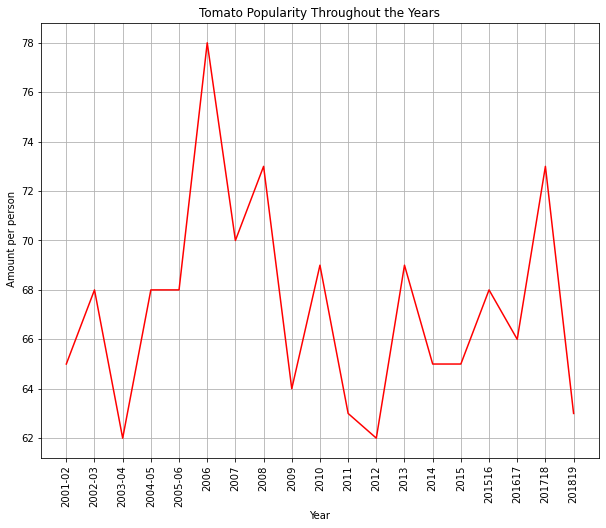

In [13]:
ln,plot=plt.subplots (figsize=(10, 8))
plt.plot(years,numtom,color="red")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Popularity Throughout the Years")
plt.show ()

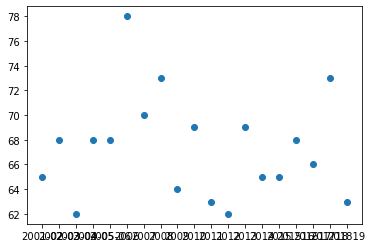